<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/xyz_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-06 17:27:29--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9887 (9.7K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   9.66K  --.-KB/s    in 0s      

2022-06-06 17:27:29 (95.1 MB/s) - ‘utils.py’ saved [9887/9887]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

!pip install -q tensorflow-io
import tensorflow_io as tfio

from utils import ModelCreator, get_train_val_ds, ErrorAnalyzer, get_class_weight

     |████████████████████████████████| 25.9 MB 1.2 MB/s 


In [4]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16
HUB_URL = 'https://tfhub.dev/google/bit/m-r50x1/1'

In [5]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [6]:
train_ds, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 16580 files belonging to 16 classes.
Found 3508 files belonging to 16 classes.


In [8]:
classes, class_weight = get_class_weight()

In [7]:
train_ds = (
    train_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tfio.experimental.color.rgb_to_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

val_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tfio.experimental.color.rgb_to_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [9]:
xyz_creator = ModelCreator(HUB_URL, 'XYZ-model')
xyz_model = xyz_creator.make_model(img_size=IMG_SIZE)

Model: "XYZ-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23500352  
                                                                 
 dense (Dense)               (None, 600)               1229400   
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                9616      
                                                                 
Total params: 24,739,368
Trainable params: 1,239,016
Non-trainable params: 23,500,352
_________________________________________________________________


In [10]:
callbacks = xyz_creator.get_callbacks()

# **First** day of training

In [14]:
history = xyz_model.fit(train_ds,
                        callbacks=callbacks,
                        epochs=25,
                        class_weight=class_weight)

Epoch 1/25
519/519 [==============================] - 2665s 5s/step - loss: 1285.7012 - auc: 0.4276 - accuracy: 0.5987
Epoch 2/25
519/519 [==============================] - 172s 328ms/step - loss: 1400.2124 - auc: 0.4820 - accuracy: 0.6511
Epoch 3/25
519/519 [==============================] - 170s 324ms/step - loss: 1394.4506 - auc: 0.5243 - accuracy: 0.6875
Epoch 4/25
519/519 [==============================] - 174s 333ms/step - loss: 1170.0436 - auc: 0.5599 - accuracy: 0.7136
Epoch 5/25
519/519 [==============================] - 182s 349ms/step - loss: 975.6834 - auc: 0.5901 - accuracy: 0.7364
Epoch 6/25
519/519 [==============================] - 182s 347ms/step - loss: 831.1248 - auc: 0.6078 - accuracy: 0.7490
Epoch 7/25
519/519 [==============================] - 177s 338ms/step - loss: 727.5509 - auc: 0.6239 - accuracy: 0.7598
Epoch 8/25
519/519 [==============================] - 174s 333ms/step - loss: 558.0904 - auc: 0.6487 - accuracy: 0.7775
Epoch 9/25
519/519 [==================

In [15]:
xyz_model.save('./drive/MyDrive/checkpoints/xyz-model-25.h5')

In [16]:
analyzer = ErrorAnalyzer(model=xyz_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='XYZ-model-1')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


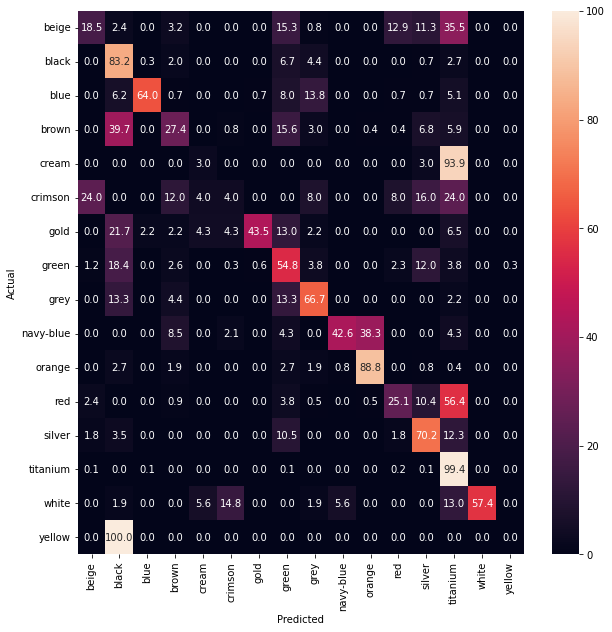

In [17]:
analyzer.plot_confusion_mat()

In [18]:
analyzer.evaluate_model()

Calculateing error types...
Writing in log file...
 All done. Check log file => XYZ-model-1.csv
Accuracy: %73.03
Precision mean: 0.5668749999999999
Recall mean: 0.467875


In [19]:
xyz_model.save('./drive/MyDrive/checkpoints/xyz-model-25.h5')

In [ ]:
history = xyz_model.fit(train_ds,
                        callbacks=callbacks,
                        epochs=40,
                        initial_epoch=25,
                        class_weight=class_weight)

Epoch 26/40
519/519 [==============================] - 178s 340ms/step - loss: 45.8086 - auc: 0.8456 - accuracy: 0.8923
Epoch 27/40
519/519 [==============================] - 188s 360ms/step - loss: 41.8102 - auc: 0.8566 - accuracy: 0.8998
Epoch 28/40
519/519 [==============================] - 175s 334ms/step - loss: 38.3330 - auc: 0.8656 - accuracy: 0.9059
Epoch 29/40
519/519 [==============================] - 174s 332ms/step - loss: 34.9387 - auc: 0.8681 - accuracy: 0.9051
Epoch 30/40
519/519 [==============================] - 190s 363ms/step - loss: 31.0190 - auc: 0.8740 - accuracy: 0.9069
Epoch 31/40
519/519 [==============================] - 176s 337ms/step - loss: 28.4231 - auc: 0.8801 - accuracy: 0.9097
Epoch 32/40
519/519 [==============================] - 179s 342ms/step - loss: 26.0471 - auc: 0.8849 - accuracy: 0.9116
Epoch 33/40
519/519 [==============================] - 183s 350ms/step - loss: 24.7707 - auc: 0.8920 - accuracy: 0.9154
Epoch 34/40
519/519 [===================

In [ ]:
xyz_model.save('./drive/MyDrive/checkpoints/xyz-model-40.h5')

In [ ]:
analyzer = ErrorAnalyzer(model=xyz_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='XYZ-model-2')

analyzer.plot_confusion_mat()
analyzer.evaluate_model()

# ***Second*** day

In [13]:
xyz_model = tf.keras.models.load_model('drive/MyDrive/checkpoints/xyz-weights-25.h5',
                                       custom_objects={'KerasLayer':hub.KerasLayer})

OSError: ignored

In [ ]:
xyz_model.save_weights('drive/MyDrive/checkpoints/xyz-weights-40.h5')

In [ ]:
analyzer = ErrorAnalyzer(model=xyz_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='XYZ-model-2')

analyzer.plot_confusion_mat()
analyzer.evaluate_model()

In [ ]:
history = xyz_model.fit(train_ds,
                        callbacks=callbacks,
                        epochs=35,
                        initial_epoch=25,
                        class_weight=class_weight)

Epoch 26/35
519/519 [==============================] - 178s 341ms/step - loss: 11.1384 - auc: 0.9240 - accuracy: 0.9101
Epoch 27/35
519/519 [==============================] - 183s 349ms/step - loss: 10.8732 - auc: 0.9241 - accuracy: 0.9113
Epoch 28/35
519/519 [==============================] - 181s 347ms/step - loss: 9.9524 - auc: 0.9314 - accuracy: 0.9145
Epoch 29/35
519/519 [==============================] - 177s 338ms/step - loss: 9.3697 - auc: 0.9309 - accuracy: 0.9134
Epoch 30/35
519/519 [==============================] - 176s 337ms/step - loss: 8.7191 - auc: 0.9366 - accuracy: 0.9169
Epoch 31/35
519/519 [==============================] - 175s 335ms/step - loss: 8.6110 - auc: 0.9369 - accuracy: 0.9166
Epoch 32/35
519/519 [==============================] - 178s 341ms/step - loss: 8.4556 - auc: 0.9396 - accuracy: 0.9209
Epoch 33/35
519/519 [==============================] - 178s 341ms/step - loss: 8.3487 - auc: 0.9394 - accuracy: 0.9202
Epoch 34/35
519/519 [=========================

In [ ]:
xyz_model.save_weights('drive/MyDrive/checkpoints/xyz-weights-35.h5')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Saving confusion matrix


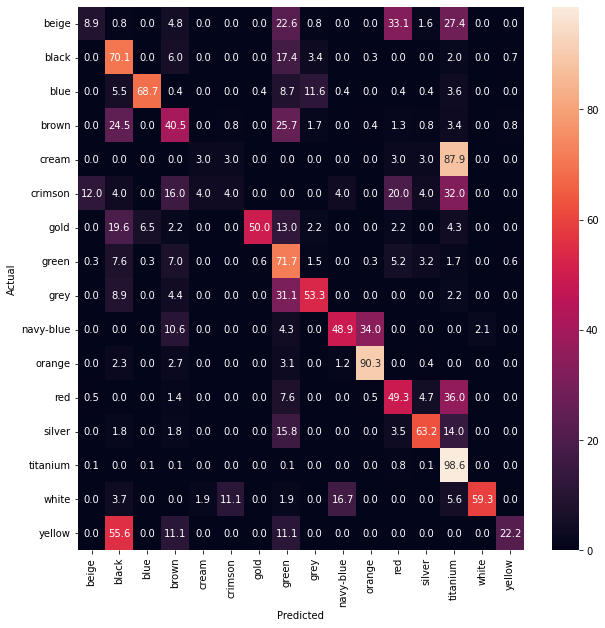

Calculating error types...
Writing in log file...
 All done. Check log file => XYZ-model-3.csv


In [ ]:
analyzer = ErrorAnalyzer(model=xyz_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='XYZ-model-3')

analyzer.plot_confusion_mat()
analyzer.evaluate_model()